In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1340 non-null   int64  
 1   age            1335 non-null   float64
 2   gender         1340 non-null   object 
 3   bmi            1340 non-null   float64
 4   bloodpressure  1340 non-null   int64  
 5   diabetic       1340 non-null   object 
 6   children       1340 non-null   int64  
 7   smoker         1340 non-null   object 
 8   region         1337 non-null   object 
 9   claim          1340 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 104.8+ KB


In [5]:
df.shape

(1340, 10)

In [6]:
pd.set_option('display.float_format', "{:.2f}".format)

In [7]:
sns.set(style="whitegrid", palette="Set2", font_scale=1.1)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.isnull().sum()

Id               0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(1332, 10)

In [12]:
df.isnull().sum()

Id               0
age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64

### Análise Descritiva: `describe()`

Esta função gera um resumo estatístico das colunas numéricas do *DataFrame*. Ela é essencial para um primeiro entendimento dos dados.

**O que cada linha significa:**

* **count:** Número de registros não nulos (ótimo para checar dados faltantes).
* **mean:** A média aritmética (o "centro" dos dados).
* **std:** O desvio padrão (o quanto os dados estão "espalhados" em relação à média).
* **min:** O menor valor encontrado na coluna.
* **25% (Q1):** O primeiro quartil. 25% dos dados estão *abaixo* deste valor.
* **50% (Q2):** A mediana. O valor do meio; 50% dos dados estão *abaixo* dele.
* **75% (Q3):** O terceiro quartil. 75% dos dados estão *abaixo* deste valor.
* **max:** O maior valor encontrado na coluna.

**Principais Insights desta Análise:**

1.  **Entender a Distribuição:** Comparar a `mean` (média) e a `50%` (mediana) é crucial.
    * Se `mean > 50%`: Os dados são assimétricos à direita (puxados por valores muito altos).
    * Se `mean < 50%`: Os dados são assimétricos à esquerda (puxados por valores muito baixos).
2.  **Identificar Variação:** Um `std` (desvio padrão) alto em relação à média (como visto na coluna `claim`) indica que os valores variam muito.
3.  **Detectar Anomalias:** Os valores `min` e `max` são ótimos para um "teste de sanidade" e para encontrar *outliers* (ex: uma idade de 200 anos ou um custo negativo).

In [13]:
df.describe(include='all')

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
count,1332.00,1332.00,1332,1332.00,1332.00,1332,1332.00,1332,1332,1332.00
unique,NaN,NaN,2,NaN,NaN,2,NaN,2,4,NaN
top,NaN,NaN,male,NaN,NaN,No,NaN,No,southeast,NaN
freq,NaN,NaN,670,NaN,NaN,695,NaN,1058,442,NaN
mean,674.47,38.09,NaN,30.66,94.19,NaN,1.10,NaN,NaN,13325.25
std,384.70,11.11,NaN,6.12,11.45,NaN,1.21,NaN,NaN,12109.62
min,1.00,18.00,NaN,16.00,80.00,NaN,0.00,NaN,NaN,1121.87
25%,341.75,29.00,NaN,26.20,86.00,NaN,0.00,NaN,NaN,4760.16
50%,674.50,38.00,NaN,30.35,92.00,NaN,1.00,NaN,NaN,9412.97
75%,1007.25,47.00,NaN,34.73,99.00,NaN,2.00,NaN,NaN,16781.33


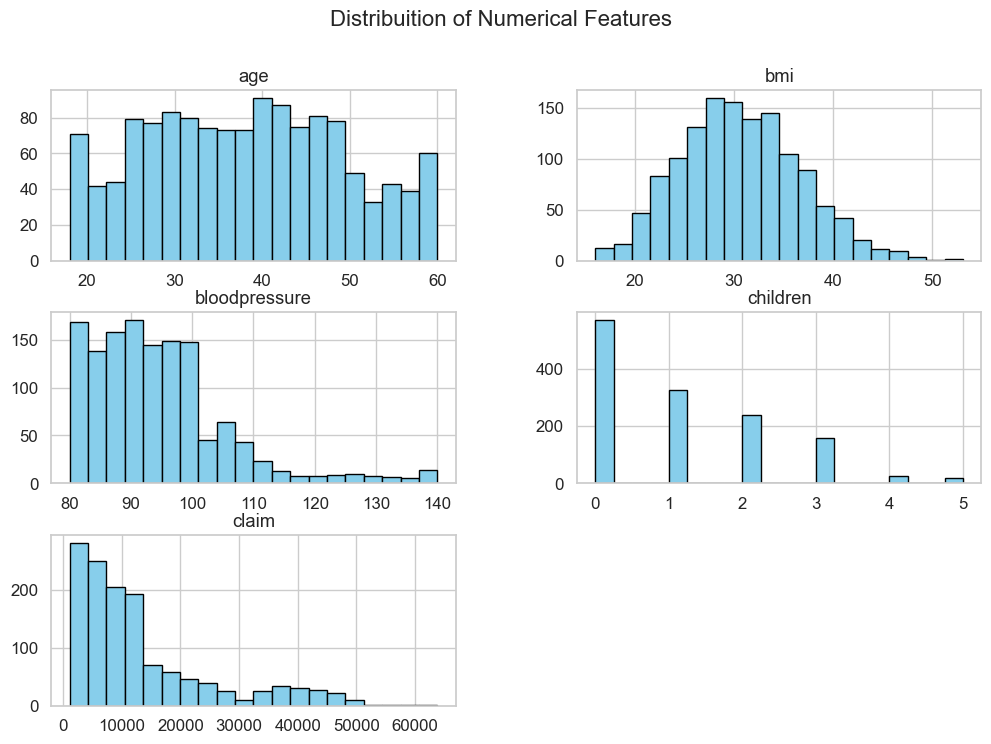

In [14]:
numeric_cols = ["age", "bmi", "bloodpressure", "children", "claim"]
df[numeric_cols].hist(bins=20, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle('Distribuition of Numerical Features', fontsize=16)
plt.show();

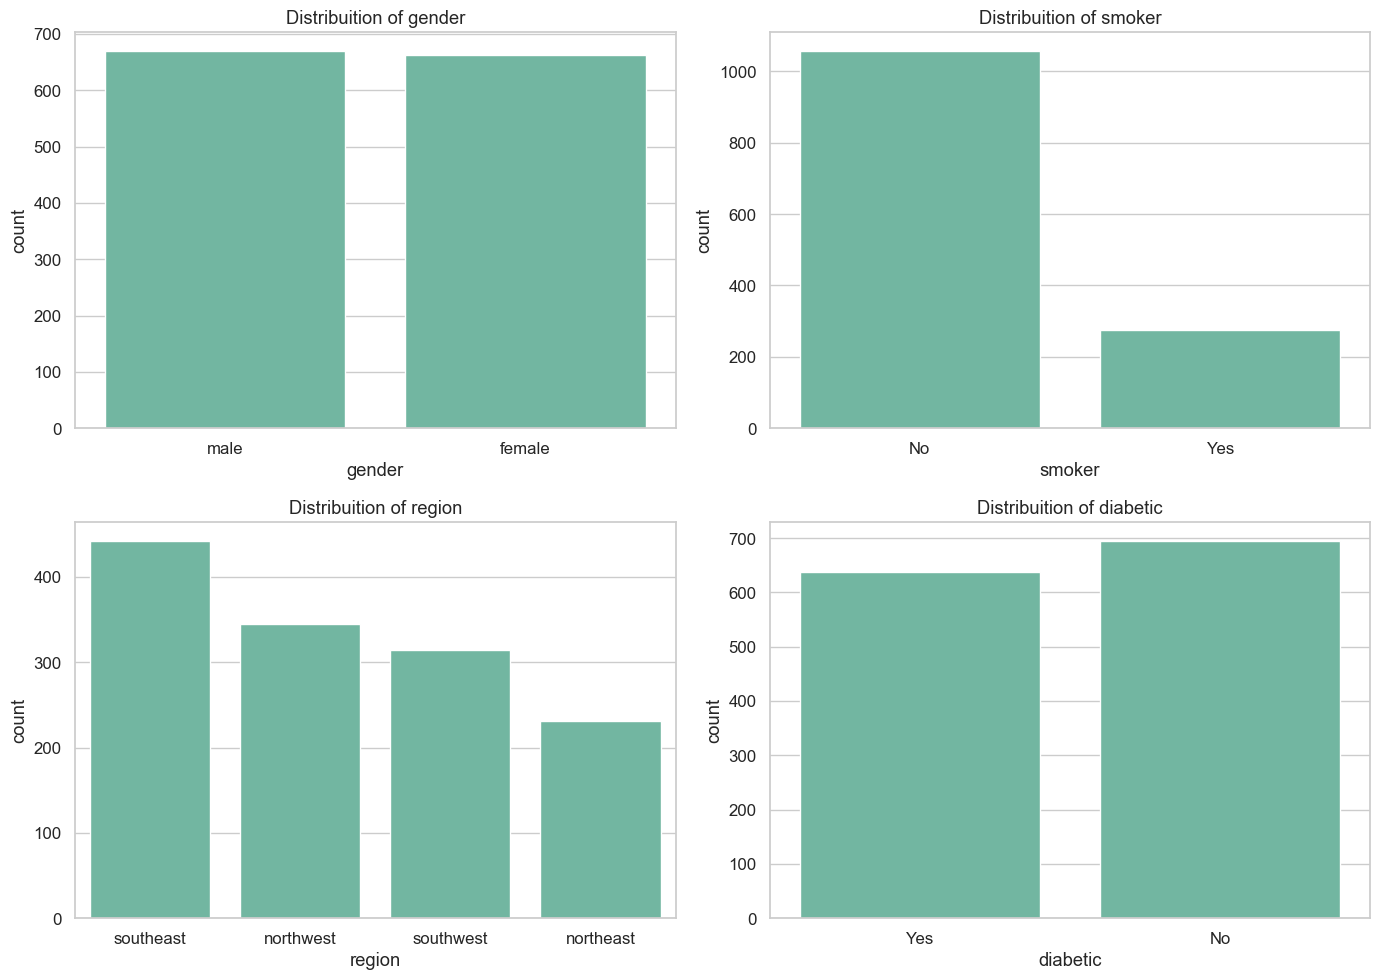

In [15]:
cat_cols = ["gender", "smoker", "region", "diabetic"]

plt.figure(figsize=(14, 10))
 
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2,2, i)
    sns.countplot(data = df, x = col)
    plt.title(f"Distribuition of {col}")

plt.tight_layout()
plt.show()

In [16]:
df.groupby(["gender", "smoker"])["claim"].mean().round(2)

gender  smoker
female  No        8762.30
        Yes      30679.00
male    No        8169.25
        Yes      33042.01
Name: claim, dtype: float64

Não-Fumantes (barras verdes):

As barras de erro são curtas.

Significado: A maioria dos não-fumantes tem custos de seguro (claim) muito parecidos e próximos da média (que é baixa, em torno de 8.000). Há pouca variação.

Fumantes (barras laranjas):

As barras de erro são extremamente longas.

Significado: Os custos para fumantes são muito espalhados. Embora a média seja alta (acima de 30.000), existem muitos fumantes com custos muito mais altos e outros com custos muito mais baixos que essa média.

Em resumo: O errorbar está lhe dizendo que os custos de seguro para fumantes não são apenas mais altos na média, mas também são muito mais imprevisíveis e variáveis do que os custos para não-fumantes.

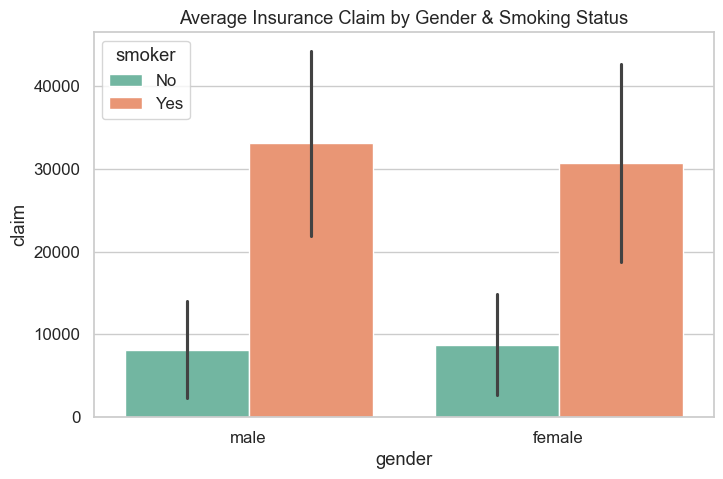

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(data = df, x = "gender", y="claim", hue="smoker", estimator="mean", errorbar="sd")
plt.title("Average Insurance Claim by Gender & Smoking Status")
plt.show()

In [18]:
pivot_region_diabetic = df.groupby(["region", "diabetic"])["claim"].mean().unstack()

In [19]:
pivot_region_diabetic

diabetic,No,Yes
region,,
northeast,16966.86,16818.30
northwest,11442.83,12224.96
southeast,13578.72,12574.09
southwest,13069.91,12313.74


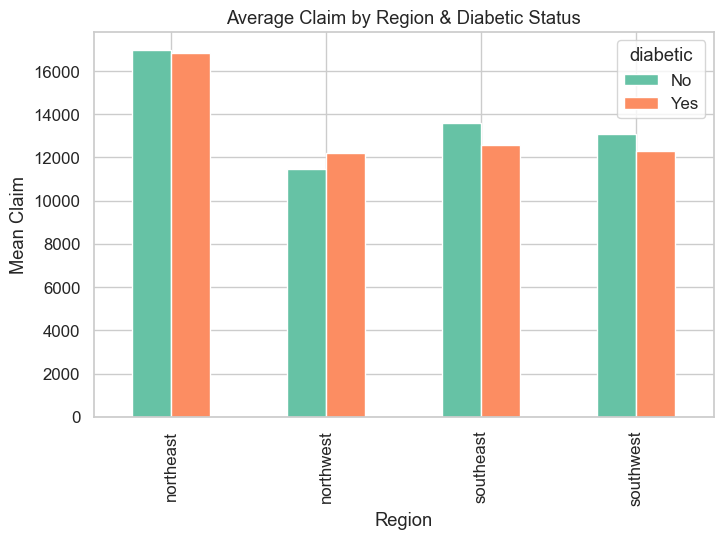

In [20]:
pivot_region_diabetic.plot(kind='bar', figsize=(8,5))
plt.title("Average Claim by Region & Diabetic Status")
plt.ylabel("Mean Claim")
plt.xlabel("Region")
plt.show()

In [21]:
pivot_table = pd.pivot_table(df, values='claim', index="region", columns="smoker", aggfunc="mean")
pivot_table

smoker,No,Yes
region,,
northeast,11666.11,29673.54
northwest,8076.20,30192.00
southeast,7444.14,34845.00
southwest,8294.75,32269.06


In [22]:
pivot_table = pd.pivot_table(df, values='claim', index='children', columns='diabetic', aggfunc='mean')
pivot_table

diabetic,No,Yes
children,,
0,12967.40,11985.29
1,12730.46,12732.06
2,15567.77,14579.36
3,13807.61,17091.26
4,14106.63,13573.35
5,8519.04,9205.59


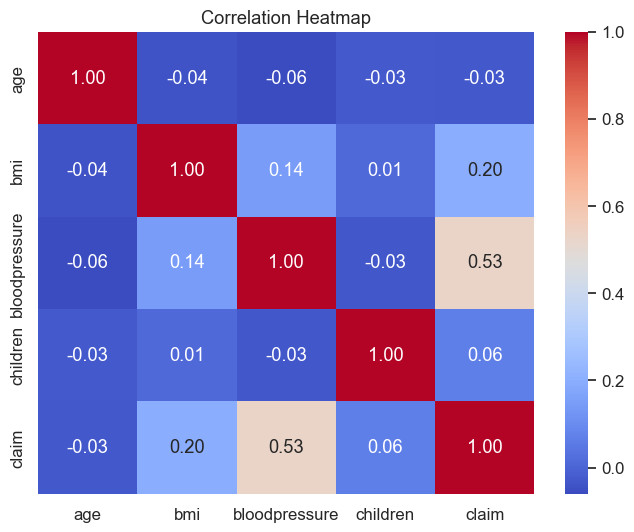

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Podemos analisar que a maior parte dos usuários que são fumantes e do sexo feminino, tendem a obter uma mensalidade de seguro de vida maior em comparação com os usuários do sexo masculino fumantes.

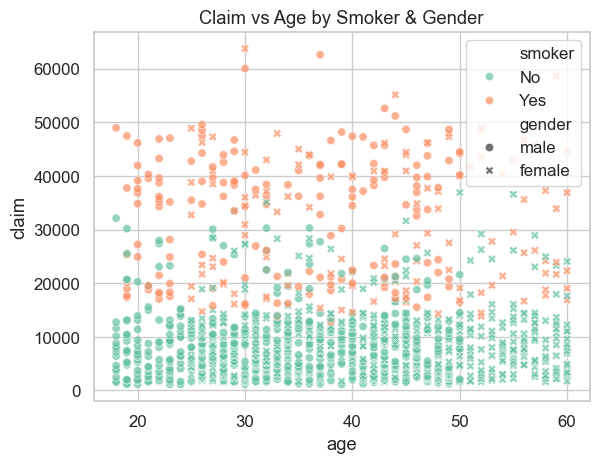

In [24]:
sns.scatterplot(data = df, x= "age", y = "claim", hue="smoker", style="gender", alpha=0.7 )
plt.title("Claim vs Age by Smoker & Gender")
plt.show()

Podemos interpretar que, a medida que o indíce de massa muscular aumenta o seguro de vida tende aumentar também

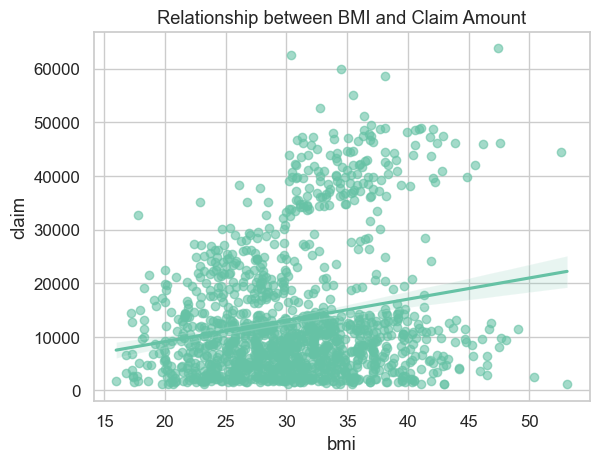

In [25]:
sns.regplot(data = df, x="bmi", y="claim", scatter_kws={"alpha":0.6})
plt.title("Relationship between BMI and Claim Amount")
plt.show()

Grupo 0 Filhos: Possui a maior quantidade de outliers com custos altíssimos.

Grupo 2 Filhos: Possui o maior Terceiro Quartil (Q3). Isso significa que 25% dos clientes desse grupo têm os custos mais altos (desconsiderando os outliers), e 75% pagam 20 mil ou menos.

Grupo 5 Filhos: Possui a menor mediana de custo e a menor variação de preço entre o Quartil 1 (Q1) e o Quartil 3 (Q3).

Tendência: A relação não é linear. O custo "típico" (mediana e caixa) parece atingir um pico no grupo de 2 filhos e depois começa a cair.

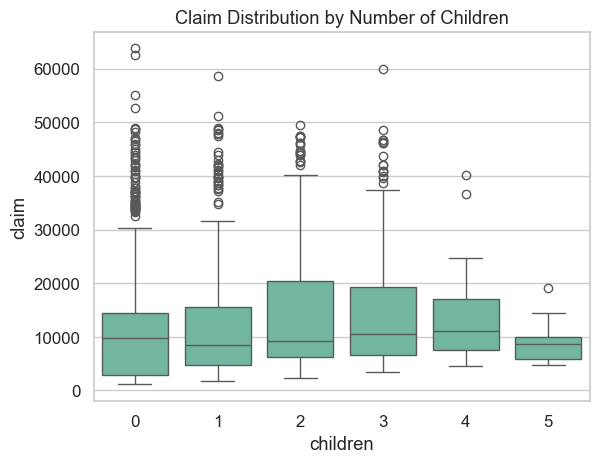

In [26]:
sns.boxplot(data = df, x= "children", y="claim")
plt.title("Claim Distribution by Number of Children")
plt.show()

isso significa que:

- <18: Idades maiores que 0 e menores ou iguais a 18.
- 18-30: Idades maiores que 18 e menores ou iguais a 30.
- 31-45: Idades maiores que 30 e menores ou iguais a 45.
- 46-60: Idades maiores que 45 e menores ou iguais a 60.
- 60+: Idades maiores que 60 e menores ou iguais a 100.

In [27]:
df["age_group"] = pd.cut(df["age"], bins=[0, 18, 30, 45, 60, 100], labels=["<18", "18-30", "31-45", "46-60", "60+"])


In [28]:
df

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_group
0,1,39.00,male,23.20,91,Yes,0,No,southeast,1121.87,31-45
1,2,24.00,male,30.10,87,No,0,No,southeast,1131.51,18-30
7,8,19.00,male,41.10,100,No,0,No,northwest,1146.80,18-30
8,9,20.00,male,43.00,86,No,0,No,northwest,1149.40,18-30
9,10,30.00,male,53.10,97,No,0,No,northwest,1163.46,18-30
...,...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.00,female,35.50,88,Yes,0,Yes,northwest,55135.40,31-45
1336,1337,59.00,female,38.10,120,No,1,Yes,northeast,58571.07,46-60
1337,1338,30.00,male,34.50,91,Yes,3,Yes,northwest,60021.40,18-30
1338,1339,37.00,male,30.40,106,No,0,Yes,southeast,62592.87,31-45


In [29]:
df["age_group"].value_counts()

age_group
31-45    553
46-60    383
18-30    380
<18       16
60+        0
Name: count, dtype: int64

Barras de Erro Longas (como as suas): Indicam que, dentro daquele grupo, os valores de claim são muito espalhados.

Exemplo: No grupo "18-30", a média de custo é de mais ou menos 14.000. A barra de erro longa nos diz que, embora a média seja essa, existem clientes nesse grupo pagando valores muito mais baixos e muito mais altos que 14.000. Os custos para esse grupo não são consistentes.

Barras de Erro Curtas (Hipotético): Se as linhas pretas fossem curtinhas, isso significaria que quase todos os clientes daquele grupo pagam um valor muito próximo da média. Haveria alta consistência e baixa variabilidade.

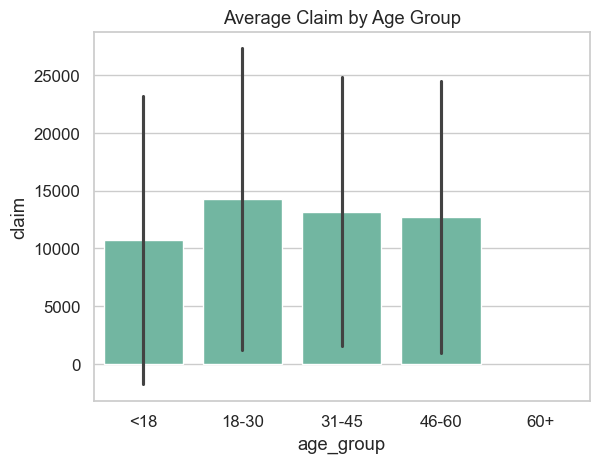

In [30]:
sns.barplot(data = df, x="age_group", y="claim", estimator="mean", errorbar="sd")
plt.title("Average Claim by Age Group")
plt.show()

In [31]:
df["bmi_category"] = pd.cut(df["bmi"], bins=[0, 18.5, 24.9, 29.9, 100], labels=["Underweight", "Normal weight", "Overweight", "Obese"])

In [32]:
df["bmi_category"].value_counts()

bmi_category
Obese            702
Overweight       387
Normal weight    222
Underweight       21
Name: count, dtype: int64

Quanto maior o Índice de Massa Corporal (especialmente na categoria 'Obeso') e sendo fumante, maior será o custo do seguro.

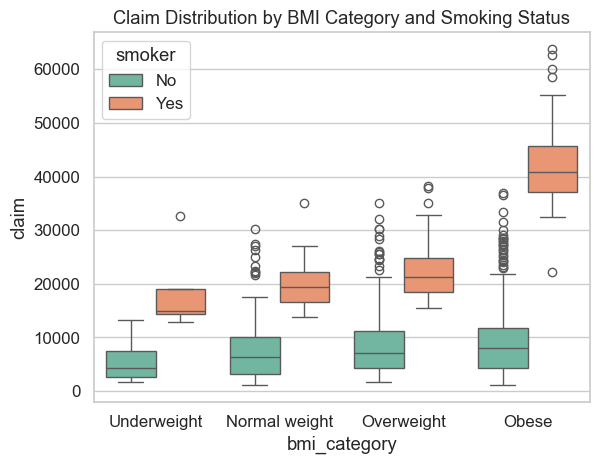

In [33]:
sns.boxplot(data = df, x="bmi_category", y="claim", hue="smoker")
plt.title("Claim Distribution by BMI Category and Smoking Status")
plt.show()

In [34]:
region_status = df.groupby("region").agg(
    smoker_rate = ("smoker", lambda x: (x == "Yes").mean() * 100),
    mean_claim = ("claim", "mean")
).reset_index()

In [35]:
region_status

,region,smoker_rate,mean_claim
0,northeast,29.00,16889.04
1,northwest,16.81,11794.22
2,southeast,20.59,13085.50
3,southwest,18.47,12723.13


O método .twinx() é a estrela deste código. Ele resolve um problema comum: como plotar duas variáveis com unidades e escalas completamente diferentes (ex: % e R$) no mesmo gráfico?

Quando você chama ax2 = ax1.twinx(), você está fazendo o seguinte:

Cria um segundo eixo Y no lado direito do gráfico.
Cria uma nova área de plotagem invisível (ax2) que fica perfeitamente sobreposta à primeira (ax1).
O mais importante: ax2 compartilha o mesmo eixo X que ax1 (é por isso que se chama "twinx" - gêmeo do X), mas tem seu próprio eixo Y independente.
Isso permite que o gráfico de barras use a escala do eixo Y da esquerda e o gráfico de linha use a escala do eixo Y da direita.

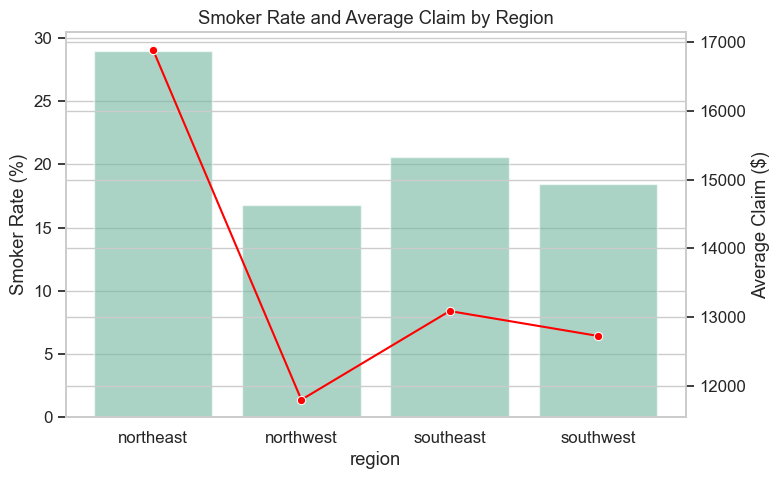

In [36]:
fig, ax1 = plt.subplots(figsize=(8,5))
sns.barplot(data = region_status, x="region", y="smoker_rate", ax= ax1, alpha=0.6)
ax2 = ax1.twinx()
sns.lineplot(data = region_status, x="region", y="mean_claim", ax = ax2, color='red', marker='o')
ax1.set_ylabel("Smoker Rate (%)")
ax2.set_ylabel("Average Claim ($)")
plt.title("Smoker Rate and Average Claim by Region")
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib

In [38]:
df.columns

Index(['Id', 'age', 'gender', 'bmi', 'bloodpressure', 'diabetic', 'children',
       'smoker', 'region', 'claim', 'age_group', 'bmi_category'],
      dtype='object')

In [39]:
X = df[["age", "bmi", "bloodpressure", "diabetic", "children", "smoker", "gender"]]
y = df["claim"]

In [40]:
X

,age,bmi,bloodpressure,diabetic,children,smoker,gender
0,39.00,23.20,91,Yes,0,No,male
1,24.00,30.10,87,No,0,No,male
7,19.00,41.10,100,No,0,No,male
8,20.00,43.00,86,No,0,No,male
9,30.00,53.10,97,No,0,No,male
...,...,...,...,...,...,...,...
1335,44.00,35.50,88,Yes,0,Yes,female
1336,59.00,38.10,120,No,1,Yes,female
1337,30.00,34.50,91,Yes,3,Yes,male
1338,37.00,30.40,106,No,0,Yes,male


In [41]:
cat_cols = ["gender", "diabetic", "smoker"]
label_encoders = {}



Vamos usar seus exemplos:

diabetic: Se os valores são "sim" e "não".

O LabelEncoder vai mapear, por exemplo, "não" para 0 e "sim" para 1.
A coluna diabetic que antes tinha textos, agora terá os números 0 e 1. O resultado final é o mesmo que você pensou, pois só há duas categorias.
gender: Se os valores são "masculino" e "feminino".

O LabelEncoder vai mapear, por exemplo, "feminino" para 0 e "masculino" para 1.
A coluna gender única será atualizada com esses valores. Não serão criadas as colunas "masculino" e "feminino". A coluna original é modificada para conter 0s e 1s.
O processo que você descreveu (criar uma coluna para cada categoria) é chamado de One-Hot Encoding e é feito com outra ferramenta, como o OneHotEncoder do Scikit-learn.

O que o fit_transform faz?
fit_transform é um atalho que combina duas operações:

fit() (Ajustar/Aprender): Nesta etapa, o LabelEncoder analisa a coluna e "aprende" quais são todas as categorias únicas. Por exemplo, na coluna gender, ele identifica que existem "masculino" e "feminino" e cria um mapa interno (ex: {"feminino": 0, "masculino": 1}).

transform() (Transformar/Aplicar): Nesta etapa, ele usa o mapa que aprendeu para substituir cada valor de texto pelo número correspondente.

Fazer fit_transform(coluna) é o mesmo que fazer fit(coluna) e depois transform(coluna), mas de uma só vez.

O que o joblib.dump faz?
joblib.dump(le, f"label_encoder_{col}.pkl") está salvando o objeto do LabelEncoder que foi treinado (le) em um arquivo.

Por que fazer isso? O LabelEncoder (le) agora contém o mapeamento específico que ele aprendeu para uma coluna (ex: "feminino" -> 0, "masculino" -> 1).
Quando você for usar seu modelo para fazer previsões com novos dados, você precisará aplicar exatamente a mesma transformação.
Ao salvar o encoder, você pode carregá-lo no futuro (joblib.load) e transformar os novos dados da mesma forma, garantindo consistência e evitando erros. Sem isso, em uma nova execução, "masculino" poderia virar 0 e "feminino" 1, invertendo o sentido e gerando previsões erradas.
Em resumo: O seu código está percorrendo cada coluna categórica, aprendendo as categorias, transformando-as em números e salvando o "tradutor" (o encoder) de cada coluna para uso futuro.

In [42]:
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

    joblib.dump(le, f"label_encoder_{col}.pkl")

C:\Users\leuci\AppData\Local\Temp\ipykernel_15992\1530066519.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\leuci\AppData\Local\Temp\ipykernel_15992\1530066519.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\leuci\AppData\Local\Temp\ipykernel_15992\1530066519.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [43]:
X

,age,bmi,bloodpressure,diabetic,children,smoker,gender
0,39.00,23.20,91,1,0,0,1
1,24.00,30.10,87,0,0,0,1
7,19.00,41.10,100,0,0,0,1
8,20.00,43.00,86,0,0,0,1
9,30.00,53.10,97,0,0,0,1
...,...,...,...,...,...,...,...
1335,44.00,35.50,88,1,0,1,0
1336,59.00,38.10,120,0,1,1,0
1337,30.00,34.50,91,1,3,1,1
1338,37.00,30.40,106,0,0,1,1


In [44]:
label_encoders

{'gender': LabelEncoder(),
 'diabetic': LabelEncoder(),
 'smoker': LabelEncoder()}

In [45]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2)

In [46]:
num_cols = ["age", "bmi", "bloodpressure", "children"]
scaler = StandardScaler()


StandardScaler padroniza os dados para que a média de cada coluna seja 0 e o desvio padrão seja 1.

 garantindo que colunas com valores muito grandes (como bmi ou bloodpressure) não dominem o modelo e tenham mais importância do que colunas com valores menores (como children). Ele coloca todas as variáveis numéricas na mesma "escala".

Qual a diferença entre fit_transform e transform?

scaler.fit_transform(X_train[num_cols])
Este comando é usado apenas nos dados de treino e faz duas coisas em sequência:

fit (Ajustar/Aprender): Primeiro, ele calcula a média (μ) e o desvio padrão (σ) de cada coluna (age, bmi, etc.) usando apenas os dados de treino (X_train). Ele "aprende" os parâmetros de escala do seu conjunto de treino e guarda esses valores de média e desvio padrão dentro do objeto scaler.

transform (Transformar): Depois, ele usa esses valores que acabou de aprender para aplicar a padronização nos dados de treino (X_train). Para cada valor na coluna, ele aplica a fórmula: (valor - média) / desvio_padrão.

Resumindo: Ele aprende os parâmetros de escala com os dados de treino e já os transforma.

scaler.transform(X_test[num_cols])
Este comando é usado nos dados de teste (e em quaisquer outros dados que você queira prever no futuro).

Aqui está o ponto crucial:

Ele NÃO calcula uma nova média ou um novo desvio padrão a partir do X_test.
Ele usa a média e o desvio padrão que foram aprendidos com os dados de treino (X_train) para transformar os dados de teste (X_test).
Por que isso é crucial?

O modelo de machine learning aprendeu os padrões dos dados de treino, que foram padronizados de uma certa maneira (com a média e desvio padrão de X_train). Para que o modelo possa fazer previsões corretas nos dados de teste, esses dados de teste precisam ser padronizados exatamente da mesma forma.

Se você usasse fit_transform nos dados de teste, estaria escalando-os com base em sua própria média e desvio padrão, o que seria uma "escala" diferente daquela que o modelo aprendeu. Isso "confundiria" o modelo e levaria a um desempenho ruim.

Resumo Final:
fit_transform: Aprende e transforma. Use somente nos dados de treino.
transform: Apenas transforma, usando o que já foi aprendido. Use nos dados de teste, validação ou qualquer novo dado.

In [47]:
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [48]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [49]:
print(X_train.shape, y_train.shape)

(1065, 7) (1065,)


In [50]:
print(X_test.shape, y_test.shape)

(267, 7) (267,)


In [51]:
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

In [52]:
def evaluate_model(model, X_train, X_test, y_train, y_test ):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return {"R2" : r2, "MAE": mae, "RMSE": rmse}

In [53]:
results = {}

## Entendendo a Regressão Linear (com 1 Variável)

Imagine que estamos usando **apenas uma** das suas colunas de `X` (as "pistas") para prever o `y` (o "alvo"). Vamos usar `bmi` para prever `claim`.

* **O Gráfico 📈:** Se você colocar `bmi` no eixo horizontal (X) e `claim` no eixo vertical (Y), você terá uma nuvem de pontos. Cada ponto é um cliente.
* **A Missão 🎯:** O modelo de Regressão Linear tem uma única missão: desenhar a **melhor linha reta possível** que passe "pelo meio" dessa nuvem de pontos.
* **A "Fórmula" da Linha:** Toda linha reta pode ser descrita por uma fórmula simples:

    > `y = m * x + b`

    No nosso exemplo:
    > `custo_previsto = m * bmi + b`

    * **`b` (Intercepto):** É o ponto de partida. É o valor do `custo_previsto` se o `bmi` fosse zero. É o "custo base".
    * **`m` (Coeficiente ou Inclinação):** Este é o número mais importante. É o "peso" da variável `bmi`. Ele nos diz: "para cada 1 ponto a mais de `bmi`, o `custo_previsto` aumenta (ou diminui) em `m` reais".

---

## Como ela "Pensa" (Como ela acha o `m` e o `b`?)

O "pensamento" do modelo é um processo para encontrar os números perfeitos para `m` e `b`. Ele faz isso medindo o **erro**.

1.  O modelo desenha uma linha qualquer.
2.  Ele olha para um cliente (um ponto). O `claim` *real* dele foi R$10.000.
3.  A linha que o modelo desenhou, para aquele `bmi`, previu um `claim` de R$8.000.
4.  O **erro** (ou "resíduo") para aquele ponto foi de R$2.000.



O modelo faz isso para **todos os pontos** no gráfico. Ele não gosta de erros.

O objetivo dele, o "cálculo" que ele faz, é ajustar a inclinação (`m`) e o ponto de partida (`b`) milhares de vezes, até encontrar a **única combinação** que resulta na **menor soma de erros possível** (tecnicamente, a "soma dos erros ao quadrado").

O nome desse método é **"Mínimos Quadrados"** (Least Squares).

---

Então, a Regressão Linear "pensa" encontrando os "pesos" (`m`) para cada variável que melhor minimizam o erro geral da previsão.

Claro, aqui está o texto formatado em Markdown:

---

## Regressão Linear Múltipla

A lógica é a mesma da Regressão Linear Simples, mas a fórmula "cresce".

### A Expansão da Fórmula

Lembra da nossa fórmula simples:
> `custo = b + m * bmi`

* `b` era o "custo base".
* `m` era o "peso" do `bmi`.

Agora, com todas as suas variáveis, o modelo não vai ter apenas *um* peso `m`. Ele vai ter **um peso para cada variável**:

> `custo = b + m1*age + m2*bmi + m3*bloodpressure + m4*diabetic + ...`

* **`b` (Intercepto):** Continua sendo o "custo base", o valor previsto se todas as outras variáveis fossem zero.
* **`m1` (Peso da `age`):** Diz o quanto o `custo` muda para cada 1 ano a mais de `age`, **assumindo que todas as outras variáveis (bmi, bloodpressure, etc.) não mudam.**
* **`m2` (Peso do `bmi`):** Diz o quanto o `custo` muda para cada 1 ponto de `bmi`, **assumindo que `age`, `bloodpressure`, etc. não mudam.**
* **`m3` (Peso da `bloodpressure`):** E assim por diante...

---

### Como ela "Pensa"? 🧠

O "pensamento" (o cálculo) é **exatamente o mesmo** que antes: **Mínimos Quadrados**.

A única diferença é que agora o trabalho do computador é mais difícil:

* **Antes (Simples):** Ele só precisava encontrar a melhor dupla (`m`, `b`).
* **Agora (Múltipla):** Ele precisa encontrar a melhor *combinação* de (`b`, `m1`, `m2`, `m3`, `m4`, `m5`, `m6`, `m7`) que, juntos, produzem a **menor "Soma dos Erros Quadrados"** possível.

Em vez de encontrar a melhor "linha" 📏 num gráfico 2D, ele agora está encontrando o melhor "plano" (ou "hiperplano" ✈️) que passa pelo meio dos pontos num espaço de 8 dimensões (7 de entrada + 1 de saída). Não conseguimos desenhar, mas o computador consegue calcular!

---

### Teste de Compreensão

Com base nisso, vamos fazer um teste:

Depois que o modelo "aprende" e nos dá todos esses pesos, digamos que ele descobre que:

* O peso `m` para **smoker** (fumante) é muito alto e positivo (ex: +20.000).
* O peso `m` para **children** (filhos) é muito baixo e negativo (ex: -300).

O que isso nos diria sobre como essas duas "pistas" (`smoker` e `children`) afetam o custo final do seguro (`claim`)?


Aqui está o texto formatado em Markdown:

## 🤖 Entendendo o GridSearchCV: O "MasterChef Robô"

Imagine que o **RandomForestRegressor** é uma **receita de bolo**. Os **`rf_params`** são as variações que você pode fazer na receita:

* **`n_estimators`**: Usar 100 ou 200 ovos?
* **`max_depth`**: Deixar o bolo crescer até 10cm, 20cm ou sem limite?
* **`min_samples_split`**: Precisar de 2 ou 5 gramas de farinha para começar a misturar?

Você não sabe qual combinação fará o bolo mais gostoso. Fazer todos os testes na mão seria um trabalho enorme.

É aí que entra o **GridSearchCV**: ele é um **"MasterChef Robô"**.

Você entrega a receita base (`rf`) e o "cardápio" de todas as variações (`rf_params`) para ele. A missão dele é testar **todas as combinações possíveis** e te dizer qual foi a vencedora.

---

### Configurando o seu "Robô"

Agora, vamos ver os parâmetros que você configurou no seu "robô":

> `rf_grid = GridSearchCV(...)`

* **`rf`**: A receita base. É o modelo que ele vai usar em todos os testes.
* **`rf_params`**: O cardápio de opções. O robô vai testar todas as 24 combinações (2 x 3 x 2 x 2).
* **`cv=3`**: O método de avaliação (Cross-Validation). Essa é a parte mais importante! Como o robô sabe que um bolo é "gostoso"? Ele não pode simplesmente provar o bolo que ele mesmo fez (isso seria ser parcial).
    * Ele pega seus dados de treino e os divide em **3 partes iguais**.
    * **Rodada 1:** Ele treina o modelo com as partes 1 e 2, e testa na parte 3. Anota a nota.
    * **Rodada 2:** Ele treina com as partes 1 e 3, e testa na parte 2. Anota a nota.
    * **Rodada 3:** Ele treina com as partes 2 e 3, e testa na parte 1. Anota a nota.
    * A nota final para aquela combinação de ingredientes é a **média das 3 notas**. Isso garante que o resultado não foi apenas "sorte" e que o modelo é bom em diferentes fatias dos dados.
* **`scoring='r2'`**: O critério de pontuação. Como o robô dá a "nota" em cada rodada? Você disse a ele para usar o **`r2_score`**. O bolo (modelo) que tiver a maior média de R² no final da validação cruzada (`cv=3`) é o campeão.
* **`n_jobs=-1`**: Acelerar o processo. Imagine que o robô tem vários "ajudantes" (os núcleos do seu processador). **`n_jobs=-1`** significa: "Use todos os ajudantes que você tiver para testar várias receitas ao mesmo tempo!". Isso torna o processo muito mais rápido.
* **`verbose=0`**: Modo silencioso. **`verbose=0`** significa: "Trabalhe em silêncio e só me avise quando terminar". Se você colocasse **`verbose=2`**, ele ficaria "falando" tudo o que está fazendo ("Testando combinação 1/24... feito. Nota: 0.85. Testando combinação 2/24...").

---

## 📋 Resumo da Lógica

Você contratou um "MasterChef Robô" (GridSearchCV) que pega sua receita de Random Forest, testa todas as combinações de ingredientes do seu cardápio de forma justa e rigorosa (**`cv=3`** e **`scoring='r2'`**), usando toda a sua equipe para ser rápido (**`n_jobs=-1`**), e no final te entrega a receita do melhor bolo (**`rf_grid.best_estimator_`**).




## 🧪 `min_samples_split`: O Teste das Regras

Lembre-se: o **GridSearchCV** vai testar essas duas opções em separado. É como se ele fizesse dois experimentos:

* **Experimento 1:** Constrói uma floresta inteira usando a regra `min_samples_split = 2`.
* **Experimento 2:** Constrói outra floresta inteira usando a regra `min_samples_split = 5`.

No final, ele vai ver qual floresta se saiu melhor e te contar qual regra foi a campeã.

Vamos ver como a árvore se comporta em cada experimento.

---

### Cenário

Imagine que, durante a construção de uma árvore, chegamos a um "nó" (um ponto de decision) com um pequeno grupo de clientes.

### Experimento 1: Usando `min_samples_split = 2` (A Regra "Agressiva")

Neste experimento, a regra é: "Você só pode tentar dividir um grupo se ele tiver **pelo menos 2 clientes**".

* **Situação A: Chega um grupo com 4 clientes.**
    * A árvore pergunta: "O tamanho do grupo (4) é maior ou igual a 2?"
    * Resposta: Sim.
    * Ação: A árvore tem permissão para procurar uma pergunta que divida esses 4 clientes em grupos ainda menores (ex: um grupo de 2 e outro de 2).

* **Situação B: Chega um grupo com 1 cliente.**
    * A árvore pergunta: "O tamanho do grupo (1) é maior ou igual a 2?"
    * Resposta: Não.
    * Ação: A árvore é **proibida** de dividir. Esse cliente sozinho se torna uma "folha" (uma resposta final).

> **Comportamento com `min_samples_split = 2`**: A árvore é muito detalhista. Ela continua dividindo os grupos até que eles fiquem minúsculos (com apenas 2 ou 3 pessoas), tentando criar regras super específicas. Isso pode levar a uma árvore muito complexa.

Aqui está o texto formatado em Markdown:

## 🍃 `min_samples_leaf`: A Lei de Segurança da Divisão

### Cenário:

A árvore está analisando um grupo (um "nó") com **8 clientes**. Ela já passou pela checagem do `min_samples_split`, então ela tem permissão para tentar dividir este grupo.

A árvore encontra uma pergunta que parece ótima: **"O cliente é fumante?"**

Essa pergunta divide os 8 clientes da seguinte forma:

* **Grupo dos Fumantes:** 1 cliente.
* **Grupo dos Não Fumantes:** 7 clientes.

Agora, a **LEI DE SEGURANÇA** (`min_samples_leaf`) entra em ação para validar essa divisão.

---

### Experimento 1: Testando com `min_samples_leaf = 1`

A Lei diz: "Cada novo grupo resultante deve ter no mínimo **1** cliente."

* **Análise:**
    * O grupo de Fumantes tem 1 cliente. (1 >= 1, **OK!**).
    * O grupo de Não Fumantes tem 7 clientes. (7 >= 1, **OK!**).
* **Veredito:** A divisão é **APROVADA**. A árvore pode usar a pergunta "O cliente é fumante?" para dividir o grupo de 8 pessoas.

---

### Experimento 2: Testando com `min_samples_leaf = 2`

A Lei diz: "Cada novo grupo resultante deve ter no mínimo **2** clientes."

* **Análise:**
    * O grupo de Fumantes tem 1 cliente. (1 < 2, **ILEGAL!**).
    * O grupo de Não Fumantes tem 7 clientes. (7 >= 2, OK!).
* **Veredito:** Como um dos grupos quebrou a lei, a divisão inteira é **REJEITADA**. A árvore é proibida de usar a pergunta "O cliente é fumante?". Ela terá que procurar outra pergunta (ex: "idade > 30?") que resulte em dois grupos com pelo menos 2 pessoas em cada um. Se não encontrar nenhuma pergunta que cumpra essa lei, o grupo original de 8 clientes não será dividido e se tornará ele mesmo uma folha final.

In [ ]:
# 1. Cria um "esqueleto" do modelo de regressão linear
lr = LinearRegression()
# 2. Treina o modelo: Ele "aprende" os melhores coeficientes (c1, c2...)
#    usando os dados de treino (X_train, y_train)
lr.fit(X_train, y_train)
# 3. Avalia o modelo treinado usando uma função sua (evaluate_model)
#    para ver o quão bom ele é, e guarda os resultados.
results["Linear Regression"] = evaluate_model(lr, X_train, X_test, y_train, y_test)
print("LinearRegression model trained")

# Variáveis para guardar o "campeão" da competição
best_poly_degree = None
best_poly_score = -np.inf # Começa com um score muito ruim, representa infinito negativo.
# Inicia uma competição: vamos testar o grau 2 e depois o grau 3
for degree in [2,3]:
     # --- Início da Rodada (ex: degree = 2) ---

    # 1. Cria o transformador que vai gerar as variáveis de grau 2
    poly = PolynomialFeatures(degree= degree)
    # 2. Cria as novas variáveis (X_train_poly) a partir dos dados de treino
    X_train_poly = poly.fit_transform(X_train)
    #    Aplica a MESMA transformação nos dados de teste
    X_test_poly = poly.transform(X_test)
    # 3. Cria um NOVO modelo de Regressão Linear, zerado
    poly_lr = LinearRegression()
    # 4. Treina esse modelo linear, mas agora com os dados "turbinados"
    #    pelas features polinomiais. O modelo agora consegue criar curvas!
    poly_lr.fit(X_train_poly, y_train)
    # 5. Avalia o modelo nos dados de teste transformados.
    #    O .score() aqui calcula o R², uma medida de quão bem o modelo se ajusta.
    score = poly_lr.score(X_test_poly, y_test)
    # 6. A GRANDE DECISÃO:
    #    O score deste modelo (ex: grau 2) foi melhor que o melhor score até agora?
    if score > best_poly_score:
        # Se sim, ele se torna o novo campeão!
        best_poly_score = score
        # Guarda tudo sobre o modelo campeão: o grau, o transformador e o modelo treinado
        best_poly_model = (degree, poly, poly_lr)
# --- Fim da Competição ---
# 7. Desempacota o modelo campeão que foi guardado em 'best_poly_model'.
#    Agora temos acesso fácil ao seu grau, seu transformador e ao modelo treinado.
degree, poly, poly_lr = best_poly_model
# 8. Avalia o modelo campeão de forma completa com a função 'evaluate_model'
#    e guarda o dicionário de métricas (R2, MAE, RMSE) no nosso placar 'results'.
#    A chave (ex: "Polynomial Regression (deg = 2)") deixa claro qual modelo foi avaliado.
results[f"Polynomial Regression (deg = {degree})"] = evaluate_model(poly_lr, poly.fit_transform(X_train), poly.transform(X_test), y_train, y_test)
print("Polynomial Regression model are trained")

# --- Treinando um Modelo Random Forest ---

# 1. Cria um "esqueleto" do modelo RandomForestRegressor.
#    Neste ponto, ele é apenas um modelo genérico, sem parâmetros definidos.
rf = RandomForestRegressor()
# 2. Define um "cardápio" de hiperparâmetros para testar.
#    O GridSearchCV vai experimentar diferentes combinações para ver qual é a melhor.


rf_params = {
    "n_estimators": [100, 200], # quantas árvores de decisão a sua floresta vai ter. Analogia: Quantos "jogos de adivinhação" você vai jogar? [100, 200] significa que o GridSearchCV vai testar construir uma floresta com 100 árvores e outra com 200.
    "max_depth": [None, 10, 20], # Analogia: É o limite de "perguntas seguidas" que você pode fazer no seu jogo. max_depth: 10 significa que, após 10 perguntas, o jogo para naquele ramo e você tem que dar uma resposta final. max_depth: None significa que não há limite; a árvore pode continuar fazendo perguntas até não poder mais dividir os grupos.
    "min_samples_split": [2, 5], # Quantas amostras mínimas para poder dividir um nó?
    "min_samples_leaf": [1, 2] # Quantas amostras mínimas devem estar em um nó folha?
}

# 3. Configura o "juiz" da competição: o GridSearchCV.
#    Ele vai testar TODAS as combinações de parâmetros do 'rf_params'.
rf_grid = GridSearchCV(rf,  # O modelo base a ser testado
                        rf_params, # O "cardápio" de parâmetros.
                          cv=3,# Validação cruzada com 3 "dobras" (divide os dados em 3 partes para testar).
                            scoring='r2', # A métrica para decidir o vencedor será o R².
                              n_jobs=-1,# Usa todos os processadores disponíveis para acelerar o processo.
                                verbose=0 # Não mostra as mensagens de log durante o treino.
                                )

# 4. Inicia a busca! O GridSearchCV treina e avalia todos os modelos.
#    Isso pode demorar, pois está testando 2 * 3 * 2 * 2 = 24 combinações diferentes.
rf_grid.fit(X_train, y_train)
# 5. Pega o "campeão": o modelo com a melhor combinação de parâmetros encontrada na busca.
best_rf = rf_grid.best_estimator_
# 6. Avalia o modelo campeão com a nossa função e guarda o resultado no placar 'results'.
results["Random Forest"] = evaluate_model(best_rf, X_train, X_test, y_train, y_test)
# 7. Imprime uma mensagem de conclusão e mostra quais foram os melhores parâmetros encontrados.
print("Random Forest training is completed, best parameters:", rf_grid.best_params_)

LinearRegression model trained
